### **Submission rules**:
1. The completed assignment should be prepared as s a Jupyter Notebook (.ipynb file). Please make a copy of this notebook for your team. Make sure you opened it via UCU email address. Submit the Jupyter Notebook (.ipynb file) to **cms**.
2. Please execute all the cells before submission; make sure there are no errors, everything has been generated, and all numerical answers calculated.
3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
4. You also need to provide a work breakdown structure estimating the efforts of each team member. Please provide it at the top of your notebook.
5. The final deadline is **April 9 2024, 23:59**.

**IMPORTANT**: If you submit your assignment after this time and date, it will not be graded.

**Team**:
Daryna Kuzyshyn\
Olha Havryliuk\
Anastasiia Dynia

**Work breakdown**:\
Olha Havryliuk - implementation of the SVD of symmetric matrices, image compression using SVD\
Anastasiia Dynia - results, a part of theory explanation\
Daryna Kuzyshyn - results, a part of theory explanation



# Image compression with SVD

The singular value decomposition of a matrix A is the factorization of A into the
product of three matrices:
$\begin{align}
 A = UDV^T,
 \end{align}$
where the columns of U and V are orthonormal and
the matrix D is diagonal with positive real entries. The SVD is useful in many tasks. First, in many applications, the data matrix A is close to a
matrix of low rank and it is useful to find a low rank matrix which is a good approximation
to the data matrix. You will show that from the singular value decomposition of A, we can get the matrix B of rank k which best approximates A; in fact, we can do this for every
k. Also, singular value decomposition is defined for all matrices (rectangular or square) unlike spectral decomposition, although the latter one is used more commonly in Linear Algebra.

Considering that any image can be represented as a rectangular matrix, you can find the best rank k approximation of this image using SVD. The idea is that by significantly reducing the storage space, you can still preserve a very good quality of the image

In [1]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pywt
import matplotlib.pyplot as plt
import sys
import copy

### SVD of symmetric matrices (0.5 pts)

Here you have a symmetric matrix A. Compute a full SVD of this matrix (you may use built-in SVD functions).


In [2]:
A = np.array([[1, 2, 3, 4], [2, 7, 4, 5], [3, 4, 3, 8], [4, 5, 8, 3]], dtype=float)

U, D, Vt = np.linalg.svd(A)
D = np.diag(D)

print("Matrix U:\n", U)
print("Matrix D:\n", D)
print("Matrix Vt:\n", Vt)

Matrix U:
 [[-0.30461046 -0.14903379  0.31295055  0.88716591]
 [-0.54242371 -0.07127124 -0.83165076  0.09515223]
 [-0.53433563 -0.64331012  0.35591771 -0.41708524]
 [-0.57225381  0.74757035  0.28938132 -0.17298151]]
Matrix D:
 [[17.33847234  0.          0.          0.        ]
 [ 0.          5.15839249  0.          0.        ]
 [ 0.          0.          2.79573697  0.        ]
 [ 0.          0.          0.          0.97581683]]
Matrix Vt:
 [[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [ 0.14903379  0.07127124  0.64331012 -0.74757035]
 [ 0.31295055 -0.83165076  0.35591771  0.28938132]
 [-0.88716591 -0.09515223  0.41708524  0.17298151]]


Explain what matrices did you get as a result. What can you say about singular values of this matrix (about its eigenvalues)? Derive singular values without using built-in functions.

**Explanations**

The Singular Value Decomposition of a matrix $A$ breaks it down into three matrices: $U$, $D$, and $V^T$, where:

1. U: is an orthogonal matrix. The columns of $U$ are the left singular vectors of $A$. For a symmetric matrix $A$, matrix $U$ contains eigenvectors of $AA^T$.

2. D: is a diagonal matrix. It containes the singular values of $A$. Singular values are always non-negative and are arranged in descending order. For a symmetric and non-singular matrix $A$, the singular values are the absolute values of its eigenvalues and are equal to the square roots of the eigenvalues of $A^TA$ and $AA^T$. Since $A$ is symmetric, $A^TA = A^2$, it implies that the eigenvalues of $A$, and hence the singular values, are real and non-negative, also they are equal up to the sign .

3. $V^T$: is an orthogonal matrix. The rows of $V^T$ are the right singular vectors of $A$. For a symmetric matrix - $A$, $V^T$ also contains eigenvectors of $A^TA$.



In [3]:
def dominant_eigenvector(matrix, iterations):
    np.random.seed(0)
    vector = np.random.rand(matrix.shape[1])

    for i in range(iterations):
        temp_vector = np.dot(matrix, vector)
        norm = np.linalg.norm(temp_vector)
        vector = temp_vector / norm

    return np.dot(vector.T, np.dot(matrix, vector)), vector

def singular_values_and_vectors(matrix, size, iterations):
    singular_values = []
    temp_matrix = matrix.copy()

    for i in range(size):
        eigenvalue, vector = dominant_eigenvector(temp_matrix, iterations)
        singular_values.append(np.sqrt(eigenvalue))
        temp_matrix -= eigenvalue * np.outer(vector, vector) / np.dot(vector, vector)

    return singular_values


A_transposed_A = np.dot(A.T, A)

values = singular_values_and_vectors(A_transposed_A, min(A.shape), 1000)

print("Singular Values:", values)


Singular Values: [17.33847234312846, 5.158392491555988, 2.795736974632023, 0.9758168262044915]


How $SVD$ relates to matrises $Q, D, Q^T$ in spectral decomposition of this matrix? Are they identical? If they are, can you say that SVD of symmetric matrices always corresponds to its spectral decomposition? If not, then is it possible to find such symmetric matrises that SVD and spectral decomposition are identical?

The spectral decomposition states that for matrix A, which is the symmetric matrix with orthormal diagonalization $A=PDP^{-1}$ with $P=[\vec{U_1},...,\vec{U_n}]$ the following holds true:\
$$A = PDP^T=\lambda_1\vec{U_1}\vec{U_1^T} +...+\lambda_n\vec{U_n}\vec{U_n^T}$$

This is almost a valid SVD, except the diagonal elements of $𝐷$ might not be nonnegative.\
So, actually, the matrices for SVD and spectral decomposition are not always equal. They will be equal only in the case, where all matrices are positive semi-definite, because all eigenvalues will be non-negative, implying that $D$ will have only non-negative entries and $U$ will be equal to $V$.


### Image compression using SVD (1.5 pts)


Upload the picture of a dog.

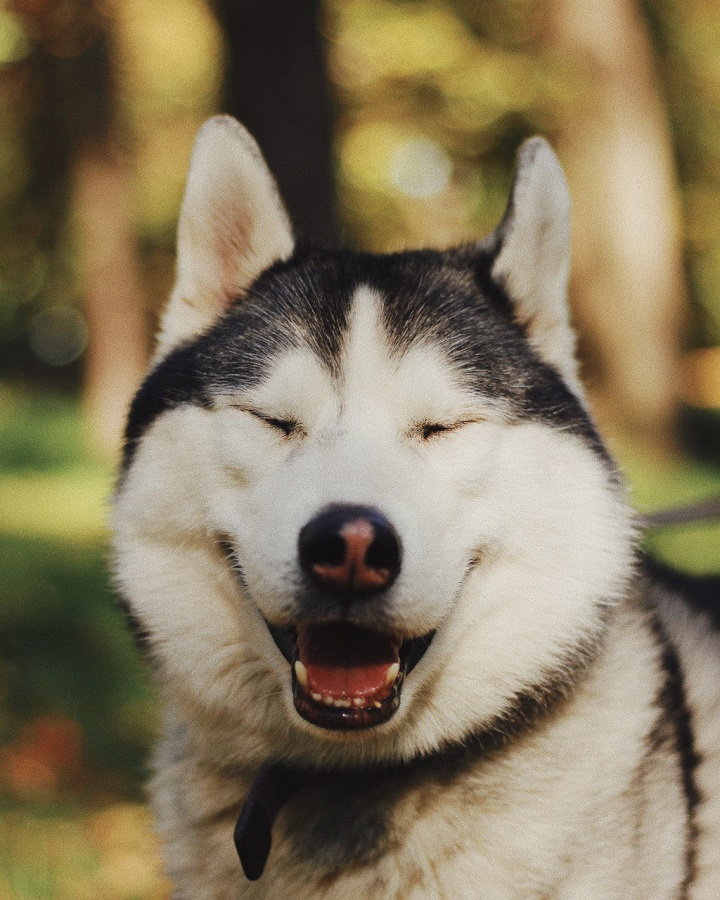

In [4]:
path = 'happy-dog.jpg'
image = cv.imread(path)
image = image.astype('float32')
image_copy = copy.deepcopy(image)
cv2_imshow(image)



Complete the below function for finding a reduced SVD of a given matrix. (You may use the functions for finding eigenvalues of the matrix). Highlight the key differences between SVD and the reduced version of it.

In [5]:
def reduced_svd(A):
    '''
    Computes the reduced singular value decomposition of a matrix A.

    Args:
        A: A real matrix of any shape.

    Returns:
        U: The left singular vectors matrix of A.
        singular_values: The singular values of A.
        VT: The transpose of the right singular vectors matrix of A.
    '''
    tolerance = 1e-6

    eig_values, eig_vectors = np.linalg.eig(A.T @ A)

    order = np.argsort(eig_values)[::-1]
    eig_values = eig_values[order]
    eig_vectors = eig_vectors[:, order]

    non_zero = ~np.isclose(eig_values, 0, atol=tolerance)
    eig_values = eig_values[non_zero]
    eig_vectors = eig_vectors[:, non_zero]

    singular_values = np.sqrt(eig_values)

    V = eig_vectors

    U = (A @ V) / singular_values

    return U, np.diag(singular_values), V.T


U, singular_values, VT = reduced_svd(A)

print("U:\n", U)
print("Singular values:\n", singular_values)
print("V^T:\n", VT)


U:
 [[-0.30461046  0.14903379  0.31295055  0.88716591]
 [-0.54242371  0.07127124 -0.83165076  0.09515223]
 [-0.53433563  0.64331012  0.35591771 -0.41708524]
 [-0.57225381 -0.74757035  0.28938132 -0.17298151]]
Singular values:
 [[17.33847234  0.          0.          0.        ]
 [ 0.          5.15839249  0.          0.        ]
 [ 0.          0.          2.79573697  0.        ]
 [ 0.          0.          0.          0.97581683]]
V^T:
 [[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [-0.14903379 -0.07127124 -0.64331012  0.74757035]
 [ 0.31295055 -0.83165076  0.35591771  0.28938132]
 [-0.88716591 -0.09515223  0.41708524  0.17298151]]


The reduced $SVD$ basically chops off all the unimportant data: if a matrix $A$ is of rank $r$, it has only $r$ positive singular values. Other are zeros.
Thus, the reduced $SVD$ gets rid of those zero values $\sigma_i$ and corresponding left and right singular vectors that results in $m \times r$ matrix $U$,
$r \times r$ matrix $\Sigma$ and $r \times n$ matrix $V^T$.

Inspite of that, the reduced $SVD$ still returns us the matrix $A$.

Complete the function below. It should output the k-rank approximation of the given image using previously written SVD function. Use the slider to see how the image quality changes as we increase/decrease k.

For simplification, you can convert your image to a grayscale. However, it will be appreciated if you work with RGB channels (it is possible that you'll need to modify the method below a little).

In [6]:
def k_rank_approximation(matrix, k):
    U, S, VT = reduced_svd(matrix)
    S_k = S[:k, :k]
    U_k = U[:, :k]
    VT_k = VT[:k, :]

    return np.dot(U_k, np.dot(S_k, VT_k))

@interact(k=widgets.IntSlider(min=1, max=np.linalg.matrix_rank(image[:, :, 0]), value=100), image=fixed(image))
def k_rank_compressed_image(k, image):

    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    R_k = k_rank_approximation(R, k)
    G_k = k_rank_approximation(G, k)
    B_k = k_rank_approximation(B, k)

    approximated = np.stack([R_k, G_k, B_k], axis=2)

    cv2_imshow(approximated)

    return approximated


interactive(children=(IntSlider(value=100, description='k', max=720, min=1), Output()), _dom_classes=('widget-…

In general, compressing the image to 60-80% percent of its original size  lowers its quality but human eye won't be even able to notice it. Therefore, we can win in storage while keeping almost the same image quality. Find out the range of $k$'s which result in keeping only 60-80% of the size of the original image. For what $k$'s there is no reason to use SVD for the sake of reducing storage space?

In [7]:
def compressed_size(k, image):
    """Calculate the compressed size for a given k."""
    image_shape = image.shape
    num_of_channels = 3
    itemsize = 4
    m, n = image_shape[:2]

    size_comp = (m + n + 1) * k * num_of_channels * itemsize
    return size_comp

In [8]:
image_shape = image.shape

lower_bound_k = upper_bound_k = compression_limit = 0


original_size = np.product(image_shape)
min_dimension = min(image_shape[:2])

for k in range(1, min_dimension + 1):
    comp_size = compressed_size(k, image)
    if comp_size <= 0.8 * original_size:
        upper_bound_k = k
    if comp_size <= 0.6 * original_size:
        lower_bound_k = k
    if comp_size < original_size:
        compression_limit = k
lower_bound_k += 1


print(f"Range of k for compression with 60-80%: {lower_bound_k} - {upper_bound_k}")
print(f"For k more than {compression_limit} it makes no sense to compress with SVD ")


Range of k for compression with 60-80%: 60 - 79
For k more than 99 it makes no sense to compress with SVD 


### Results (1 pt)
Choose some metric for determining how good the compression with SVD is. Experiment with other compression algorithms (DCT, for instance). Compare it with SVD. Be creative;)

The Peak Signal-to-noise ratio (**PSNR**) measures the difference in pixel value between two images, and is widely used to measure the quality of compressed or
reconstructed images.
$$PSNR = 10*\log_{10} (\frac{(L-1)^2}{MSE}) =20*\log_{10} (\frac{L-1}{\sqrt{MSE}})$$
$L$ is the number of maximum possible intensity levels in an image.\
**MSE** is the mean squared error:
$$MSE = \frac{1}{mn}*\sum_{i=0}^{m-1} \sum_{j=0}^{n-1}(O(i,j)-D(i,j))^2$$,
where **O** is the matrix data of the original image, **D** is the matrix data of the degraded image, **m** is the number of rows of pixels, **i** - index of that row of the image, **n** is the number of columns of pixels, **j** - index of that column of the image.\

In this task we will test how good the SVD is by using the described metric-PSNR, we will also implement the **FFT2 compression algorithm**, and then compare it with SVD. This technique allows us to represent an image in the frequency domain and compress it by removing negligible or small Fourier coefficients. By storing only a small percentage of significant Fourier coefficients, we can achieve significant compression rates while preserving the visual quality of the original image.

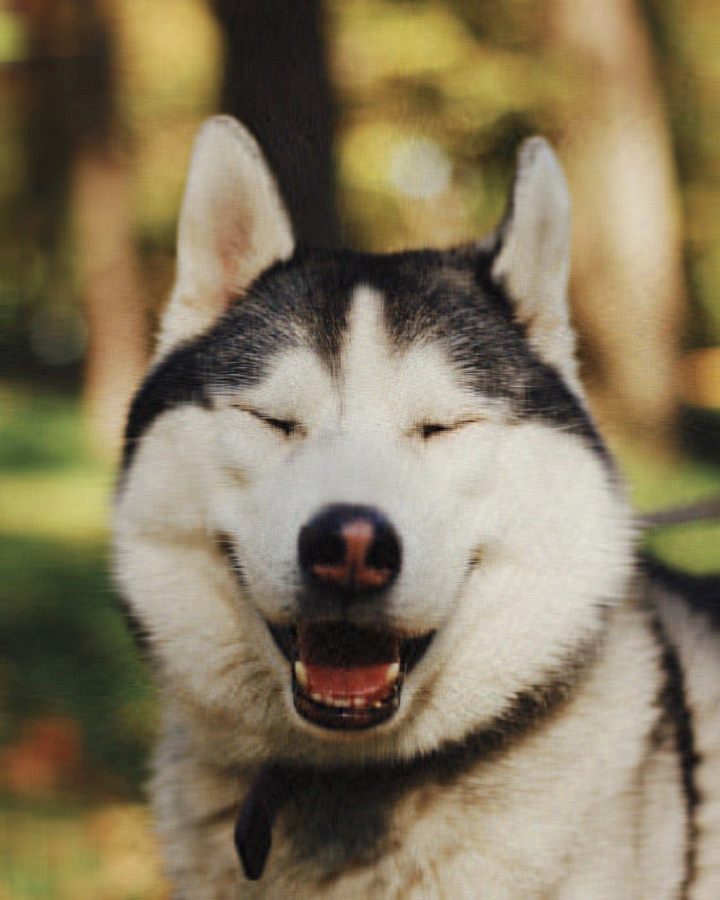

The compression ratio is equal to 60.03703703703703
The value of PSNR metric for SVD compress: 31.501826512035684
The value of threshold is equal to: 60


In [38]:
image_compressed = k_rank_compressed_image(60, image_copy)

psnr_1 = cv.PSNR(image_copy, image_compressed)

original_size = np.prod(image_copy.shape)
var = image_compressed.shape
compr_size = compressed_size(60, image_copy)
ratio = (compr_size/original_size)*100

print("The compression rate is equal to", ratio)
print("The value of PSNR metric for SVD compress:", psnr_1)
print("The value of k is equal to:", 60)

The compression rate is equal to 60.24202674897119
The value of PSNR metric for SVD compress: 50.528293416875
The value of threshold is equal to: 45


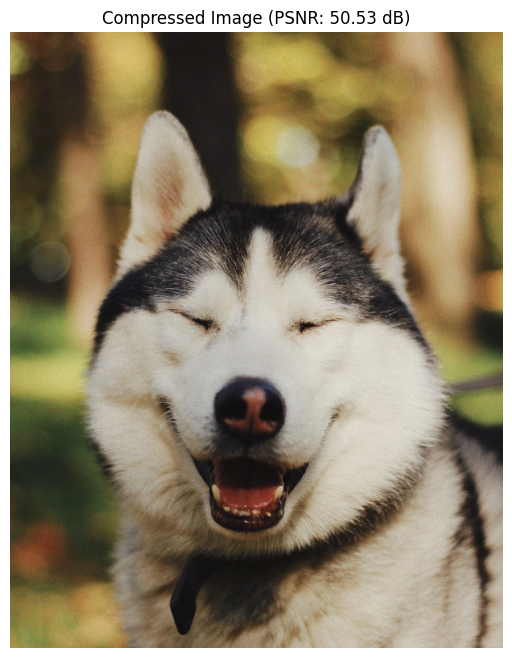

In [45]:
def fft2_compress(image, threshold):
    image_fft = np.fft.fft2(image)
    # print(image_fft)
    image_fft_compressed = image_fft.copy()
    image_fft_compressed[np.abs(image_fft) < threshold] = 0
    num_unchanged = np.sum(image_fft_compressed == np.fft.fft2(image))
    all_numbers = image_fft_compressed.size
    image_reconstructed = np.fft.ifft2(image_fft_compressed).real
    rattt = (num_unchanged/all_numbers)*100
    return image_reconstructed, rattt

image = cv.imread('happy-dog.jpg', cv.IMREAD_COLOR)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

threshold = 45

compressed_image = fft2_compress(image_rgb, threshold)[0]
compressed_image_uint8 = np.uint8(compressed_image)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
plt.imshow(compressed_image_uint8)

psnr = cv.PSNR(image_rgb, compressed_image_uint8)
# print(psnr)
plt.title('Compressed Image (PSNR: {:.2f} dB)'.format(psnr))
plt.axis('off')

print("The compression rate is equal to", fft2_compress(image_rgb, threshold)[1])
print("The value of PSNR metric for FFT2 compress:", psnr)
print("The value of threshold is equal to:", threshold)


So, we compressed both images to 60% percent of its original size, and now we can compare both compressed photos' metrics. And, as we can see, the FFT2 compression is better at compression, because it's PSNR is relatively higher.

This is a space for your suggestions, comments, threats, etc...